In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2024-06-19 10:03:12--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.1s    

2024-06-19 10:03:12 (1.79 MB/s) - ‘names.txt’ saved [228145/228145]



In [3]:
words = open("names.txt", "r").read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
stoi = {c:i+1 for i, c in enumerate(sorted(list(set(''.join(words)))))}
stoi['.'] = 0
itos = {i:c for c, i in stoi.items()}
stoi, itos

({'a': 1,
  'b': 2,
  'c': 3,
  'd': 4,
  'e': 5,
  'f': 6,
  'g': 7,
  'h': 8,
  'i': 9,
  'j': 10,
  'k': 11,
  'l': 12,
  'm': 13,
  'n': 14,
  'o': 15,
  'p': 16,
  'q': 17,
  'r': 18,
  's': 19,
  't': 20,
  'u': 21,
  'v': 22,
  'w': 23,
  'x': 24,
  'y': 25,
  'z': 26,
  '.': 0},
 {1: 'a',
  2: 'b',
  3: 'c',
  4: 'd',
  5: 'e',
  6: 'f',
  7: 'g',
  8: 'h',
  9: 'i',
  10: 'j',
  11: 'k',
  12: 'l',
  13: 'm',
  14: 'n',
  15: 'o',
  16: 'p',
  17: 'q',
  18: 'r',
  19: 's',
  20: 't',
  21: 'u',
  22: 'v',
  23: 'w',
  24: 'x',
  25: 'y',
  26: 'z',
  0: '.'})

In [5]:
block_size = 3
X, y = [], []

for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
y = torch.tensor(y)

In [6]:
X.shape

torch.Size([228146, 3])

In [7]:
C = torch.randn(27, 2)
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [8]:
W1 = torch.randn(6, 100)
b1 = torch.randn(100)

In [9]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h.shape

torch.Size([228146, 100])

In [10]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [11]:
logits = h @ W2 + b2
logits.shape

torch.Size([228146, 27])

In [12]:
counts = logits.exp()

In [13]:
probs = counts/counts.sum(dim=1, keepdim=True)
probs.shape

torch.Size([228146, 27])

In [15]:
loss = -probs[torch.arange(len(y)), y].log().mean()
loss

tensor(17.1528)

In [79]:
g = torch.Generator().manual_seed(42)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [75]:
for p in parameters:
  p.requires_grad = True

In [76]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [78]:
lri = []
lossi = []

for epoch in range(10000):

  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, y[ix])

  # backward pass
  for p in parameters:
    p.grad = None

  loss.backward()
  # lr = lrs[epoch]
  lr = 0.001
  for p in parameters:
    p.data += -lr * p.grad
  # lri.append(lr.item())
  # lossi.append(loss.item())
  # print(f"epoch:{epoch}, loss:{loss}")
print(loss)

tensor(8.9517, grad_fn=<NllLossBackward0>)


In [48]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, y)
loss

tensor(2.3176, grad_fn=<NllLossBackward0>)

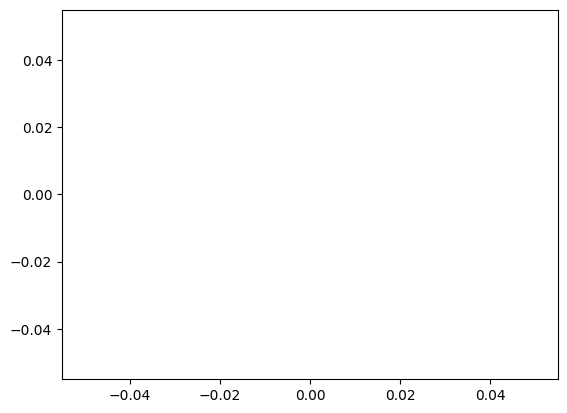

In [20]:
plt.plot(lri, lossi)

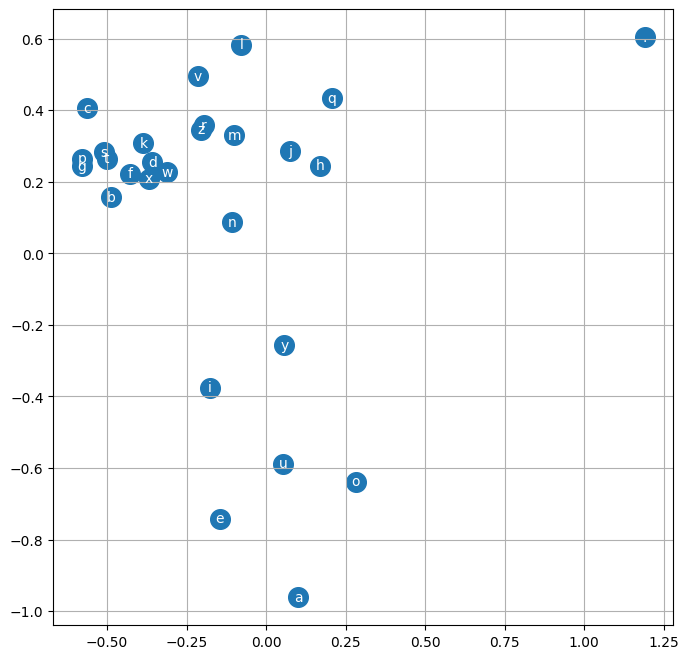

In [51]:
# plot the embedding
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [52]:
# sample from the model

g = torch.Generator().manual_seed(42)
for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)

    if ix == 0:
      break

  print(''.join(itos[i] for i in out))


yeesyahli.
ame.
dleektim.
mannya.
tryandan.
endena.
daya.
jiah.
abkeles.
lon.
toy.
alitki.
pupolannezane.
shamley.
waina.
lun.
kayahn.
zerial.
tan.
kigsemlam.


split dataset into three set

In [106]:
def build_dataset(words):
  block_size = 3
  X, y = [], []
  for w in words:
    context = [0] * block_size
    for char in w + '.':
      ix = stoi[char]
      X.append(context)
      y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  y = torch.tensor(y)
  print(X.shape, y.shape)
  return X, y


import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, ytr = build_dataset(words[:n1])
Xdev, ydev = build_dataset(words[n1:n2])
Xte, yte = build_dataset(words[n2:])


torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [119]:
g = torch.Generator().manual_seed(42)

C = torch.randn(size=(27, 10), generator=g)
W1 = torch.randn(size=(30, 256), generator=g)
b1 = torch.randn(size=(256,), generator=g)
W2 = torch.randn(size=(256, 27), generator=g)
b2 = torch.randn(size=(27,), generator=g)



parameters = [C, W1, b1, W2, b2]
for p in parameters:
  p.requires_grad = True

In [120]:
epochs_idx = []
losses = []

In [144]:
for epoch in range(10000):
  ix = torch.randint(0, Xtr.shape[0], size=(32,))
  embed = C[Xtr[ix]]
  h = torch.tanh(embed.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, ytr[ix])

  for p in parameters:
    p.grad = None

  loss.backward()

  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  losses.append(loss.item())
  epochs_idx.append(epoch)
print(loss)


tensor(2.1188, grad_fn=<NllLossBackward0>)


In [145]:
embed = C[Xtr]
h = torch.tanh(embed.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, ytr)
loss

tensor(2.3047, grad_fn=<NllLossBackward0>)

In [146]:
embed = C[Xdev]
h = torch.tanh(embed.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, ydev)
loss

tensor(2.3544, grad_fn=<NllLossBackward0>)

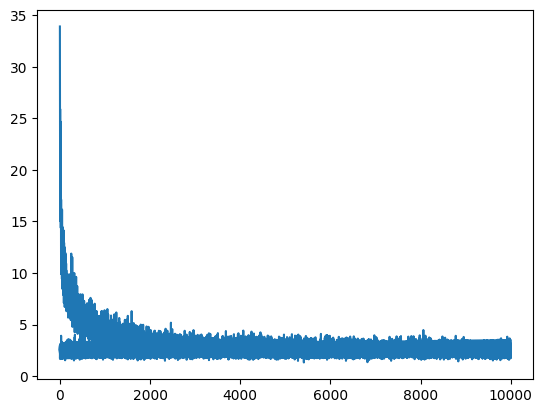

In [147]:
plt.plot(epochs_idx, losses)

In [151]:
for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor(context)]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)

    ix = torch.multinomial(probs, 1).item()
    context = context[1:] + [ix]
    out.append(ix)

    if ix == 0:
      break

  print("".join(itos[i] for i in out))

zypenten.
preton.
tyannah.
luna.
braxton.
alalynn.
yoniy.
rayes.
lonnielin.
jahni.
ravon.
zie.
yea.
dike.
ricobenidi.
zsey.
jadedia.
caden.
sakaseleinishillivanner.
misherinilan.
